In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Fuzzyfication

In [2]:
persediaan = ctrl.Antecedent(np.arange(0, 177, 1),'Persediaan')
penjualan = ctrl.Antecedent(np.arange(0, 210, 1),'Penjualan')

In [3]:
pembelian = ctrl.Consequent(np.arange(0, 151, 1),'Pembelian')

In [4]:
persediaan['sedikit'] = fuzz.trimf(persediaan.universe,(13, 13, 78.2))
persediaan['sedang'] = fuzz.trimf(persediaan.universe,(29.3, 94.5, 159.7))
persediaan['banyak'] = fuzz.trimf(persediaan.universe,(110.8, 176, 176))

D:\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


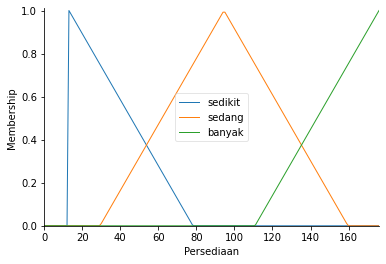

In [5]:
persediaan.view()

In [6]:
penjualan['sedikit'] = fuzz.trimf(penjualan.universe,(40, 40, 107.6))
penjualan['sedang'] = fuzz.trimf(penjualan.universe,(56.9, 124.5, 192.1))
penjualan['banyak'] = fuzz.trimf(penjualan.universe,(141.4, 209, 209))

D:\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


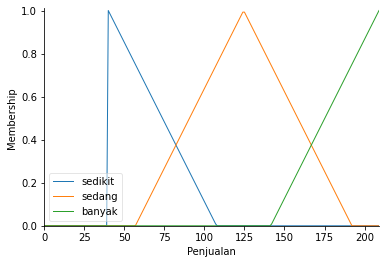

In [7]:
penjualan.view()

In [8]:
pembelian['sedikit'] = fuzz.trimf(pembelian.universe,(0, 0, 60))
pembelian['sedang'] = fuzz.trimf(pembelian.universe,(15, 75, 135))
pembelian['banyak'] = fuzz.trimf(pembelian.universe,(90, 150, 150))

D:\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


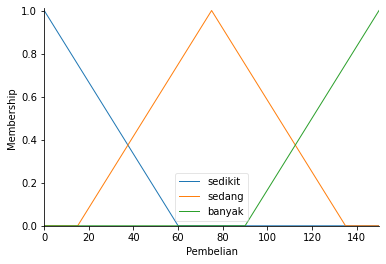

In [9]:
pembelian.view()

# Inference

In [10]:
rule1 = ctrl.Rule(persediaan['sedikit'] & penjualan['sedikit'], pembelian['sedikit'])
rule2 = ctrl.Rule(persediaan['sedikit'] & penjualan['sedang'], pembelian['sedang'])
rule3 = ctrl.Rule(persediaan['sedikit'] & penjualan['banyak'], pembelian['banyak'])
rule4 = ctrl.Rule(persediaan['sedang'] & penjualan['sedikit'], pembelian['sedikit'])
rule5 = ctrl.Rule(persediaan['sedang'] & penjualan['sedang'], pembelian['sedang'])
rule6 = ctrl.Rule(persediaan['sedang'] & penjualan['banyak'], pembelian['banyak'])
rule7 = ctrl.Rule(persediaan['banyak'] & penjualan['sedikit'], pembelian['sedikit'])
rule8 = ctrl.Rule(persediaan['banyak'] & penjualan['sedang'], pembelian['sedang'])
rule9 = ctrl.Rule(persediaan['banyak'] & penjualan['banyak'], pembelian['banyak'])

In [11]:
pembelian_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])

In [12]:
nilai_pembelian = ctrl.ControlSystemSimulation(pembelian_ctrl)

# Defuzzyfication

In [13]:
nilai_pembelian.input['Persediaan'] = 15
nilai_pembelian.input['Penjualan'] = 69
nilai_pembelian.compute()

In [14]:
print(nilai_pembelian.output['Pembelian'])

47.21044531006759


D:\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


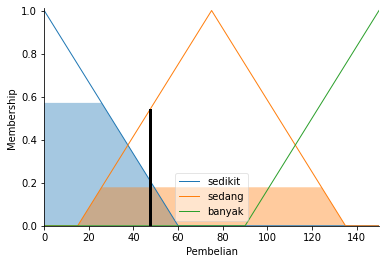

In [15]:
pembelian.view(sim=nilai_pembelian)